In [4]:
import pandas as pd
import numpy as np
import calendar  
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [6]:
# import data
df=pd.read_excel(r'C:\Users\charl\Documents\YipitData\Groupon\Data & code\Q4_2013_Groupon_North_America_Data_XLSX.xlsx',sheet_name='Q4 2013 Raw Data')
df.head()

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
0,gg-4-way-stretch-ponte-pants-1,136.85,1914.5315,2013-12-31,http://www.groupon.com/deals/gg-4-way-stretch-...,Goods,First - Party
1,24-7-heating-cooling,10.15,687.6625,2013-12-31,http://www.groupon.com/deals/24-7-heating-cooling,Local,Third - Party
2,a-better-weigh-medical-weight-loss-center,10.15,949.7500,2013-12-31,http://www.groupon.com/deals/a-better-weigh-me...,Local,Third - Party
3,above-the-barre-fitness-3,33.50,2199.3000,2013-12-31,http://www.groupon.com/deals/above-the-barre-f...,Local,Third - Party
4,abundant-moving,0.00,0.0000,2013-12-31,http://www.groupon.com/deals/abundant-moving,Local,Third - Party


In [7]:
df.shape

(138534, 7)

In [8]:
# sum up the initial gross billing
sum(df.Billings)

762020391.147812

<Figure size 1152x1152 with 0 Axes>

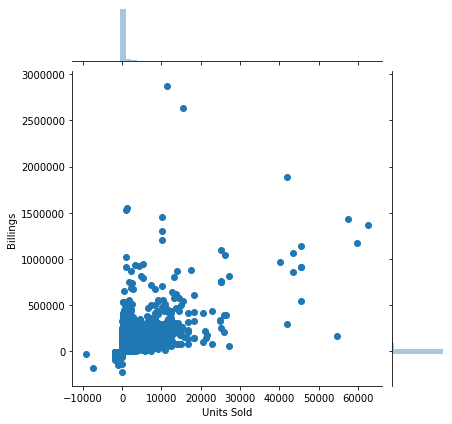

In [9]:
plt.figure(figsize=(16, 16))
sns.jointplot(x='Units Sold',y='Billings',data=df)

In [10]:
#view the distribution of units sold and billings
df[['Units Sold','Billings']].describe()

,Units Sold,Billings
count,138534.000000,1.385340e+05
mean,178.462592,5.500602e+03
std,864.551565,2.774653e+04
min,-9100.000000,-2.180629e+05
25%,1.450000,6.380000e+01
50%,19.200000,8.502000e+02
75%,99.200000,3.677450e+03
max,62500.000000,2.874885e+06


In [11]:
# calculate: unit price = billings/units sold
df['Unit Price']=df['Billings']/df['Units Sold']

In [12]:
df['Unit Price'].describe()

count    1.117600e+05
mean     1.120983e+14
std      1.365227e+16
min      1.000000e-02
25%      2.207685e+01
50%      3.900000e+01
75%      6.500000e+01
max      3.461016e+18
Name: Unit Price, dtype: float64

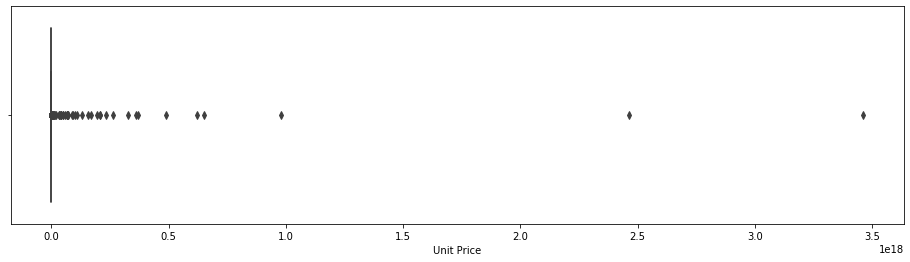

In [13]:
#view the distribution of unit prices
plt.figure(figsize=(16, 4))
sns.boxplot(x=df['Unit Price'])

Some unit prices are extremely large, which must be irregular data. For example,the largest unit price is 3.46e+18. As there aren't irregular outliers in Billings, the extremely large unit prices may result from the extremely few units sold.

In [14]:
#filter out the deals with extremely few units sold but relatively high billings
df_irregular=df[(df['Units Sold']<0.01) & (df['Units Sold']>-0.01) & ((df['Billings']> 0.01)|(df['Billings']<-0.01))]
df_irregular #it is obverious that these unit prices are irregular

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,Unit Price
3452,new-look-skin-and-laser-9,-2.664535e-15,-188.50,2012-12-10,http://www.groupon.com/deals/new-look-skin-and...,Local,Third - Party,7.074404e+16
14266,charles-river-charters,7.105427e-15,1488.00,2013-04-10,http://www.groupon.com/deals/charles-river-cha...,Local,Third - Party,2.094174e+17
15655,gg-petstages-dog-toys-2,1.307399e-14,278.76,2013-04-24,http://www.groupon.com/deals/gg-petstages-dog-...,Goods,First - Party,2.132173e+16
15711,baby-boot-camp-texas-1,-2.886580e-15,-14.50,2013-04-25,http://www.groupon.com/deals/baby-boot-camp-te...,Local,Third - Party,5.023246e+15
15877,cinestores-com-1-stlouis,6.661338e-16,58.00,2013-04-29,http://www.groupon.com/deals/cinestores-com-1-...,Local,Third - Party,8.706959e+16
15933,gg-ca-jbw-mixed-diamond-watches,2.349232e-14,86.71,2013-05-01,http://www.groupon.com/deals/gg-ca-jbw-mixed-d...,Goods,First - Party,3.690994e+15
16954,wet-paint-chicago-3,-2.842171e-14,-174.40,2013-05-18,http://www.groupon.com/deals/wet-paint-chicago-3,Local,Third - Party,6.136154e+15
17512,it-university-online-41-saskatoon,2.220446e-16,11.31,2013-05-22,http://www.groupon.com/deals/it-university-onl...,Local,Third - Party,5.093571e+16
17732,gg-white-diamond-heart-pendant-necklaces,-2.042810e-16,-126.73,2013-05-23,http://www.groupon.com/deals/gg-white-diamond-...,Goods,First - Party,6.203708e+17
18661,gl-los-angeles-angels-19-los-angeles,-4.973799e-14,-2875.45,2013-05-28,http://www.groupon.com/deals/gl-los-angeles-an...,Local,Third - Party,5.781194e+16


In [15]:
df_irregular['Unit Price'].min()

479387069710343.75

In [16]:
#exclude these irregular data
df_new=df[~df.index.isin(df_irregular.index)]

In [17]:
sum(df_new['Billings'])

762014982.2978028

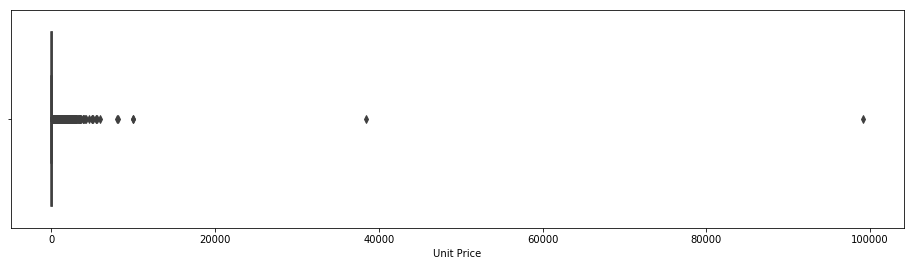

In [18]:
plt.figure(figsize=(16, 4))
sns.boxplot(x=df_new['Unit Price'])

There are still some outliers here, but it doesn't mean these data are irregular. I filter out the deals with unit price larger than $5000, and click their deal URL to find out whether they are irregular data or not.

In [19]:
df_new[df_new['Unit Price']>4000]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,Unit Price
229,forever-trim-8,2.900000e+00,1.478710e+04,2012-09-24,http://www.groupon.com/deals/forever-trim-8,Local,Third - Party,5099.000000
921,daniel-w-west-dmd-murray,1.450000e+00,6.088550e+03,2012-10-16,http://www.groupon.com/deals/daniel-w-west-dmd...,Local,Third - Party,4199.000000
15243,ga-china-tour-com-4,-7.105427e-15,-5.820766e-11,2013-04-16,http://www.groupon.com/deals/ga-china-tour-com-4,Travel,Third - Party,8192.000000
15565,icon-parking-23-long-island-westchester-county,-2.200000e+00,-2.180629e+05,2013-04-22,http://www.groupon.com/deals/icon-parking-23-l...,Local,Third - Party,99119.500455
15567,icon-parking-23-long-island,-3.650000e+00,-1.400863e+05,2013-04-22,http://www.groupon.com/deals/icon-parking-23-l...,Local,Third - Party,38379.798082
15925,gg-breitling-watch,2.668000e+00,1.476735e+04,2013-05-01,http://www.groupon.com/deals/gg-breitling-watch,Goods,First - Party,5534.990000
25895,icon-parking-37,-9.450000e+00,-5.155565e+04,2013-07-05,http://www.groupon.com/deals/icon-parking-37,Local,Third - Party,5455.624339
35213,ga-go-today-2-italy,6.300000e+00,2.883370e+04,2013-08-22,http://www.groupon.com/deals/ga-go-today-2-italy,Travel,Third - Party,4576.777778
41153,via-downer-1,2.300000e+00,9.377650e+03,2013-09-13,http://www.groupon.com/deals/via-downer-1,Local,Third - Party,4077.239130
43636,amerejuve-7,1.385000e+01,7.616115e+04,2013-09-22,http://www.groupon.com/deals/amerejuve-7,Local,Third - Party,5499.000000


By viewing the price on the URLs, I find that only deals whose indexes are 41153, 15565, 15567 and 25895 are irregular.

In [20]:
#delete these three irregular data
df_new=df_new.drop([41153,15565,15567,25895])

In [21]:
corrected_billings=sum(df_new['Billings']) 
corrected_billings #gross billings without irregular data

762415309.4618026

In [22]:
billings_by_segment=df_new.groupby('Segment')['Billings'].sum().reset_index()
billings_by_segment

,Segment,Billings
0,Goods,2.822455e+08
1,Local,4.096224e+08
2,Travel,7.054740e+07


In [23]:
#filter out local deals whose start dates are after 2013-09-28 and group them by date
#choose dates after 2013-09-28 to get 3 weeks values before missing data
df_local=df_new[(df_new['Start Date']>'2013-09-28')& (df_new['Segment']=='Local')].groupby('Start Date')['Billings'].sum().reset_index()
df_local.set_index('Start Date',inplace=True)
df_local

,Billings
Start Date,
2013-09-29,2.012469e+06
2013-09-30,3.440883e+06
2013-10-01,3.140574e+06
2013-10-02,3.010398e+06
2013-10-03,4.266867e+06
2013-10-04,3.538083e+06
2013-10-05,1.687881e+06
2013-10-06,1.632563e+06
2013-10-07,2.771953e+06


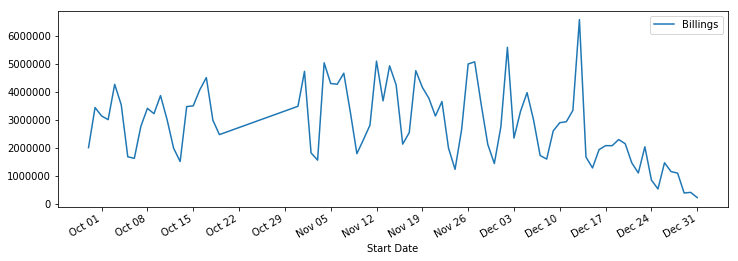

In [24]:
#plot data
fig, ax = plt.subplots(figsize=(12,4))
df_local.plot(ax=ax)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

According to this plot, I find that billings for local deals started at weekdays are always higher than those started at weekends.

In [25]:
df_local=df_local.reset_index()

def findDay(date): 
    year=date.year
    month=date.month
    day=date.day
    dayNumber = calendar.weekday(year, month, day) 
    return dayNumber


df_local['Week Day']=df_local['Start Date'].apply(lambda x : findDay(x))

In [26]:
df_local.head(10)

,Start Date,Billings,Week Day
0,2013-09-29,2.012469e+06,6
1,2013-09-30,3.440883e+06,0
2,2013-10-01,3.140574e+06,1
3,2013-10-02,3.010398e+06,2
4,2013-10-03,4.266867e+06,3
5,2013-10-04,3.538083e+06,4
6,2013-10-05,1.687881e+06,5
7,2013-10-06,1.632563e+06,6
8,2013-10-07,2.771953e+06,0
9,2013-10-08,3.412731e+06,1


To estimate the missing values, I use the billings three weeks before and three weeks after the missing values, and average the billings group by week days. For example, Oct 20 is a Sunday, I use the average billings of Sep 29, Oct 6, Oct 13, Nov 3, Nov 10 and Nov 17.

In [27]:
df_local_estimate=df_local[df_local['Start Date']<'2013-11-21']

In [28]:
days =["Monday", "Tuesday", "Wednesday", "Thursday", 
                        "Friday", "Saturday", "Sunday"] 

In [29]:
average_billings=df_local_estimate.groupby('Week Day')['Billings'].mean().reset_index()
average_billings['Week Day']=average_billings['Week Day'].apply(lambda x: days[x])

In [30]:
average_billings

,Week Day,Billings
0,Monday,3.714938e+06
1,Tuesday,3.934936e+06
2,Wednesday,3.671082e+06
3,Thursday,4.286260e+06
4,Friday,3.633878e+06
5,Saturday,1.987169e+06
6,Sunday,1.929409e+06


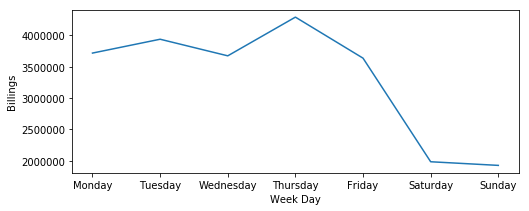

In [31]:
plt.figure(figsize=(8, 3))
sns.lineplot(x='Week Day',y='Billings',sort=False, data=average_billings)

In [32]:
#there are two Sunday, two Monday, two Tuesday, two Wednesday, one Thursday, one Friday, and one Saturday from Oct 20 to 30.
estimate_billings=average_billings.iloc[6,1]*2+average_billings.iloc[0,1]*2+average_billings.iloc[1,1]*2+average_billings.iloc[2,1]*2+average_billings.iloc[3,1]+average_billings.iloc[4,1]+average_billings.iloc[5,1]
estimate_billings

36408036.42991663

In [33]:
total_estimate_gross_billings=estimate_billings+corrected_billings
total_estimate_gross_billings

798823345.8917192

In [34]:
# add estimated billings to local segment of the corrected gross billings
billings_by_segment=df_new.groupby('Segment')['Billings'].sum()
billings_by_segment['Local']=billings_by_segment['Local']+estimate_billings
billings_by_segment.reset_index()

,Segment,Billings
0,Goods,2.822455e+08
1,Local,4.460305e+08
2,Travel,7.054740e+07


Billing estimate by segment is shown above.